In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [15]:
df = pd.read_excel("C:/Users/tjoeun-jg-303/Documents/카카오톡 받은 파일/점수표 .xlsx", sheet_name = '결과값', header=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   시군구명              233 non-null    object 
 1   동명                233 non-null    object 
 2   면적(Km2)           233 non-null    float64
 3   총 거주자수
(주민등록 기준)  233 non-null    float64
 4   무료놀이터수            233 non-null    float64
 5   지가변둥률             233 non-null    float64
 6   대형마트 갯수           233 non-null    float64
 7   급여총액              233 non-null    float64
 8   재정자립도             233 non-null    float64
 9   어린이집+유치원 개수       233 non-null    float64
 10  국공립 원생수           233 non-null    float64
 11  초중고 개수            233 non-null    float64
 12  교습소+학원개수          233 non-null    float64
 13  병원 갯수             233 non-null    float64
 14  공원수               233 non-null    float64
 15  공원면적(km2)         233 non-null    float64
 16  5대 범죄 발생건수        233 non-null    float64
 1

In [18]:
df.columns

Index(['시군구명 ', '동명', '면적(Km2)', '총 거주자수\n(주민등록 기준)', '무료놀이터수', '지가변둥률',
       '대형마트 갯수', '급여총액', '재정자립도', '어린이집+유치원 개수', '국공립 원생수', '초중고 개수',
       '교습소+학원개수', '병원 갯수', '공원수', '공원면적(km2)', '5대 범죄 발생건수', '유흥업소 수', 'cctv',
       'Unnamed: 19'],
      dtype='object')

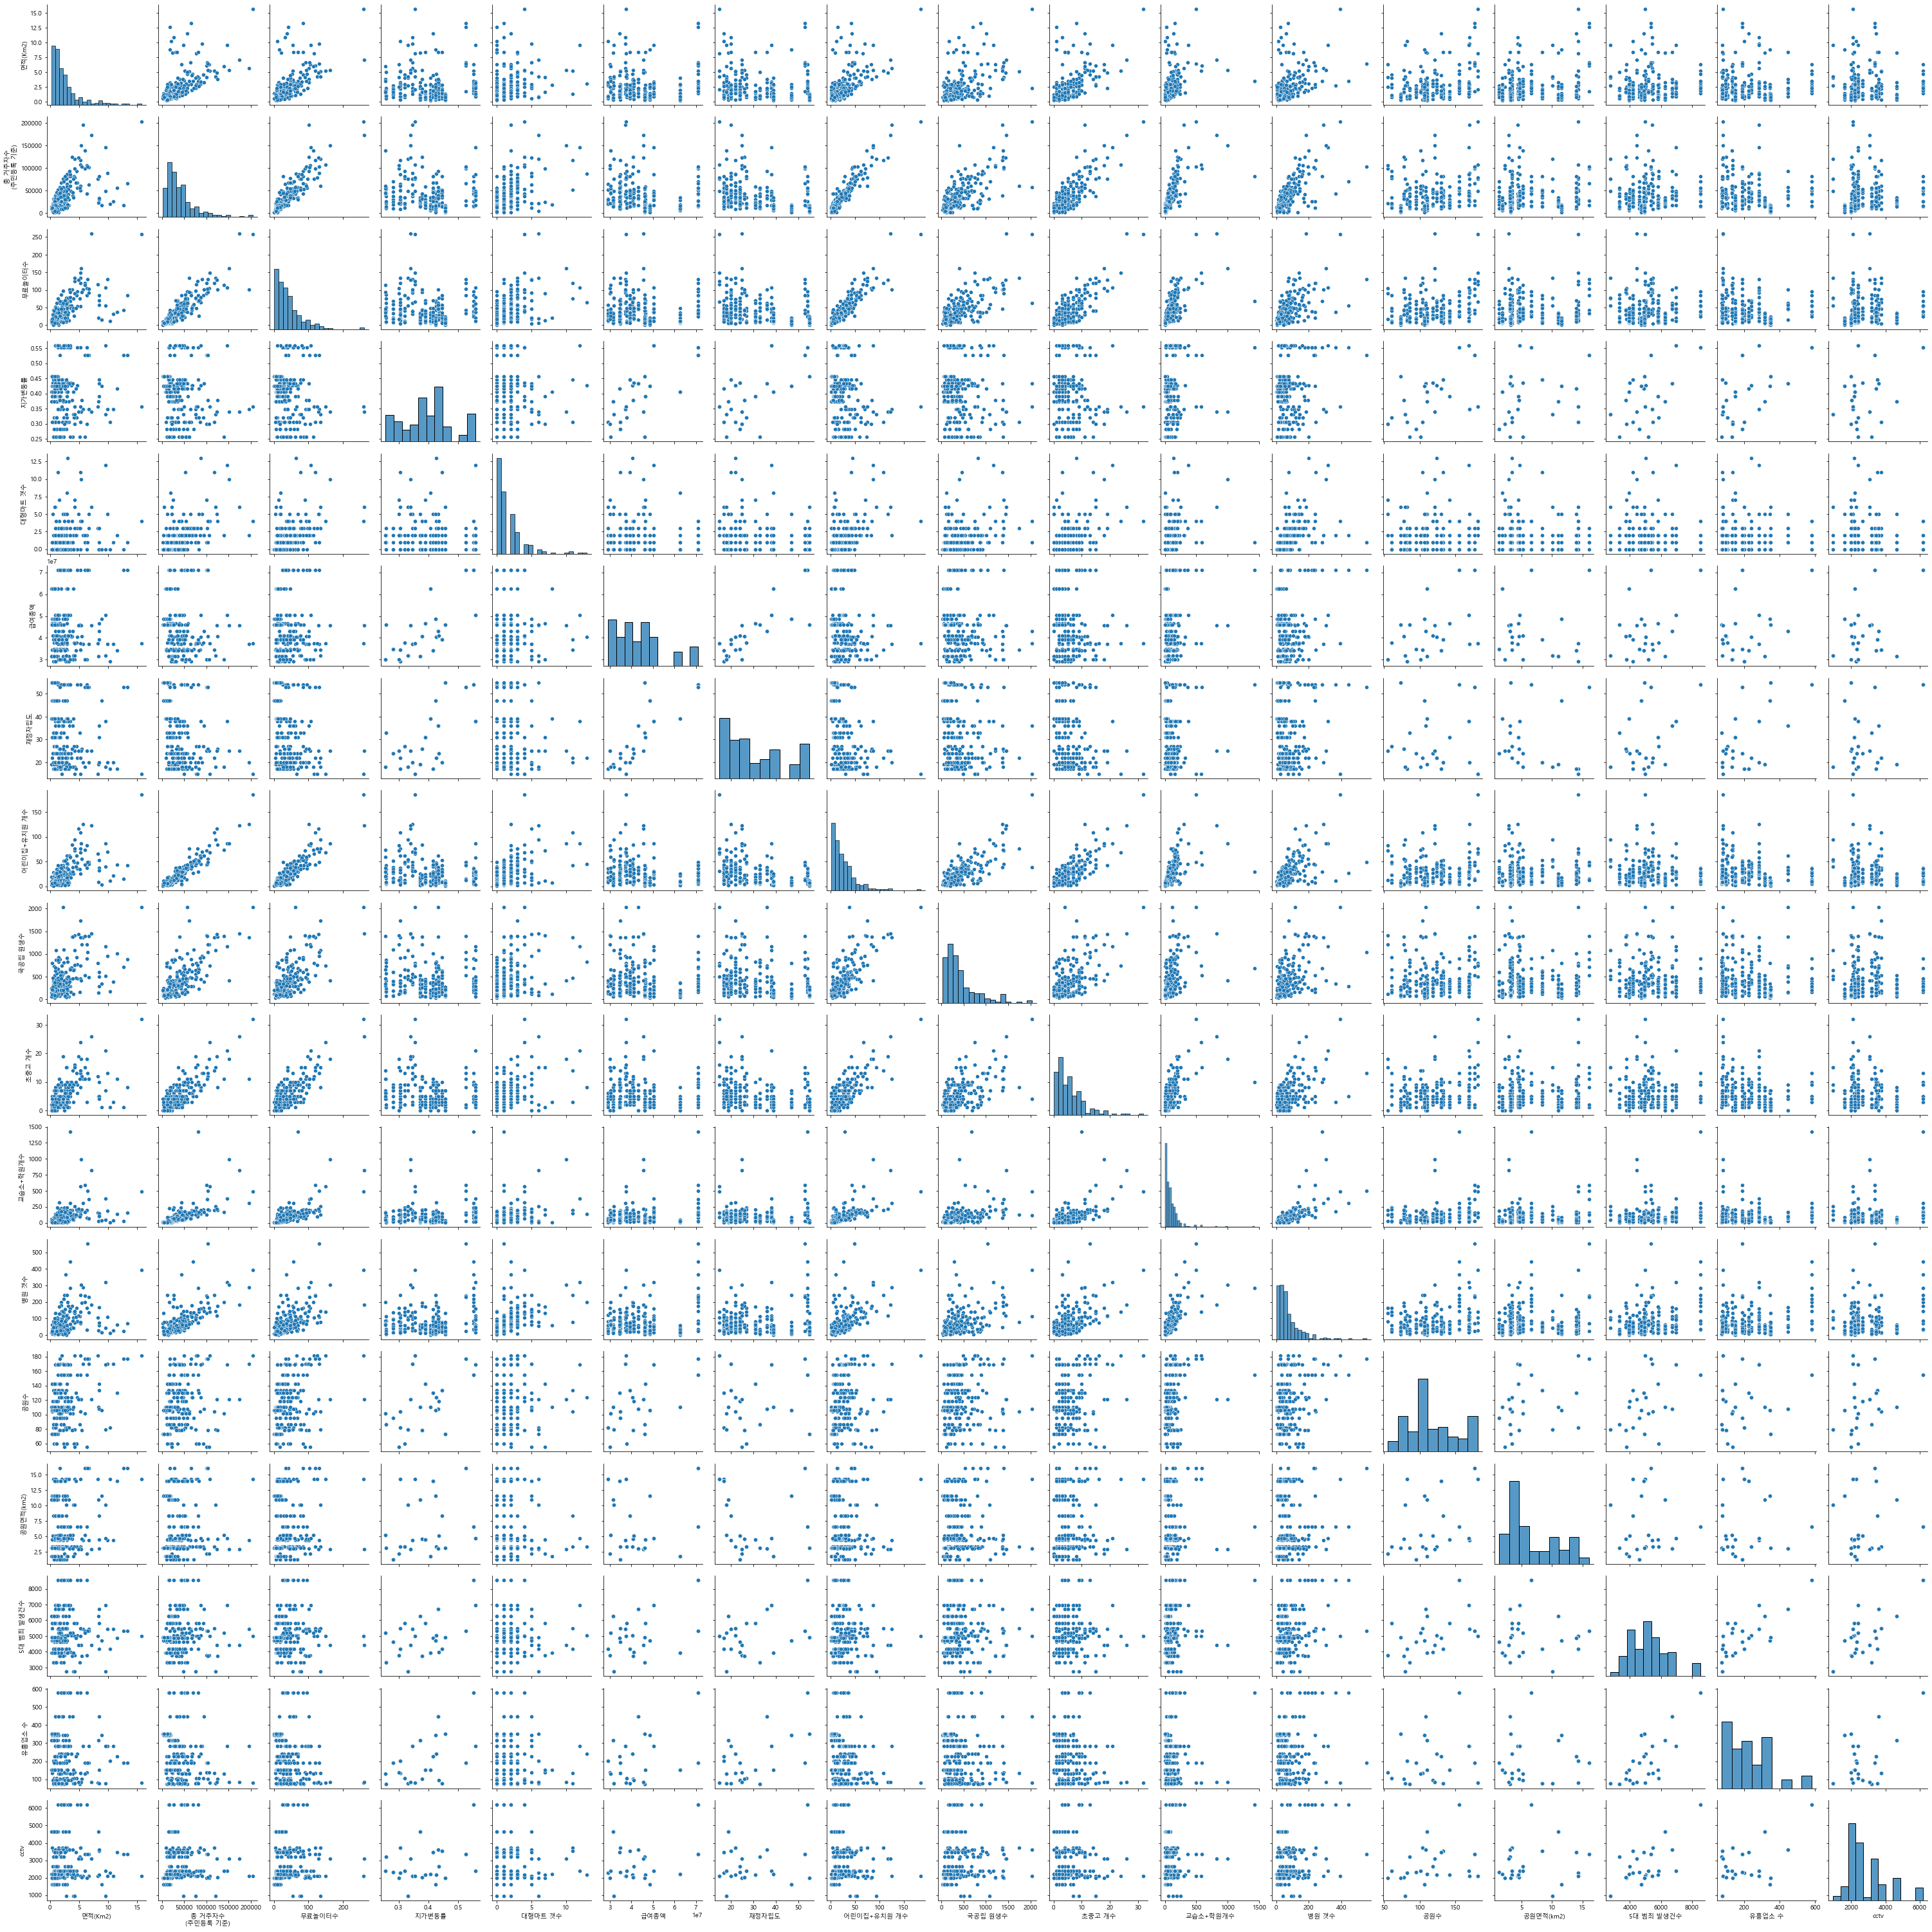

In [19]:
#pairplot 

sns.pairplot(df[['면적(Km2)', '총 거주자수\n(주민등록 기준)', '무료놀이터수', '지가변둥률',
       '대형마트 갯수', '급여총액', '재정자립도', '어린이집+유치원 개수', '국공립 원생수', '초중고 개수',
       '교습소+학원개수', '병원 갯수', '공원수', '공원면적(km2)', '5대 범죄 발생건수', '유흥업소 수', 'cctv']])

plt.show()

In [3]:
df_score = pd.read_excel("C:/Users/tjoeun-jg-303/Documents/카카오톡 받은 파일/점수표 .xlsx", sheet_name = '최종 점수표', header=0)

df_score.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gu_name           233 non-null    object 
 1   dong_name         233 non-null    object 
 2   playground_score  233 non-null    float64
 3   lpi_score         233 non-null    float64
 4   market_score      233 non-null    float64
 5   income_score      233 non-null    float64
 6   fir_score         233 non-null    float64
 7   preschool_score   233 non-null    float64
 8   school_score      233 non-null    float64
 9   acdm_score        233 non-null    float64
 10  hospital_score    233 non-null    float64
 11  park_score        233 non-null    float64
 12  crime_score       233 non-null    float64
 13  badplace_score    233 non-null    float64
 14  cctv_score        233 non-null    float64
 15  TOTAL             233 non-null    float64
dtypes: float64(14), object(2)
memory usage: 29.2

In [9]:
score_sort = df_score.sort_values(by=['TOTAL '], axis=0, ascending=False)
score_sort_top_100 = score_sort[:100]
score_sort_top_100.head()

,gu_name,dong_name,playground_score,lpi_score,market_score,income_score,fir_score,preschool_score,school_score,acdm_score,hospital_score,park_score,crime_score,badplace_score,cctv_score,TOTAL
0,강남구,대치동,4.99,6.85,4.58,7.43,6.85,4.91,4.97,13.27,5.55,4.25,4.96,4.37,5.85,78.83
1,성북구,길음동,7.86,5.58,10.79,4.63,4.17,5.99,4.65,6.35,5.10,5.49,5.75,5.93,5.85,78.14
2,송파구,거여동,7.11,6.92,5.12,5.62,5.59,5.67,5.47,5.80,5.26,4.59,5.64,5.23,5.85,73.87
3,서대문구,북아현동,8.64,5.44,4.35,4.79,4.49,6.02,6.81,5.37,5.00,5.92,5.35,5.62,5.85,73.65
4,서초구,반포동,4.99,6.54,4.48,7.43,6.78,5.30,4.79,6.16,5.40,4.71,5.37,5.81,5.85,73.61


In [10]:
score_sort_top_100['edu_total'] = score_sort_top_100['preschool_score']+ score_sort_top_100['school_score'] +score_sort_top_100['acdm_score']

<ipython-input-10-908c5515b648>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_sort_top_100['edu_total'] = score_sort_top_100['preschool_score']+ score_sort_top_100['school_score'] +score_sort_top_100['acdm_score']


In [11]:
score_sort_top_100['facil_total'] = score_sort_top_100['playground_score']+ score_sort_top_100['market_score'] +score_sort_top_100['park_score']+score_sort_top_100['hospital_score']

<ipython-input-11-8adb2b5875c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_sort_top_100['facil_total'] = score_sort_top_100['playground_score']+ score_sort_top_100['market_score'] +score_sort_top_100['park_score']+score_sort_top_100['hospital_score']


In [12]:
score_sort_top_100['income_total'] = score_sort_top_100['lpi_score']+ score_sort_top_100['income_score'] +score_sort_top_100['fir_score']

<ipython-input-12-a0ccfed1d4e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_sort_top_100['income_total'] = score_sort_top_100['lpi_score']+ score_sort_top_100['income_score'] +score_sort_top_100['fir_score']


In [13]:
score_sort_top_100['crime_total'] = score_sort_top_100['crime_score']+ score_sort_top_100['badplace_score'] +score_sort_top_100['cctv_score']

<ipython-input-13-bb9e7ac7b521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_sort_top_100['crime_total'] = score_sort_top_100['crime_score']+ score_sort_top_100['badplace_score'] +score_sort_top_100['cctv_score']


In [15]:
score_sort_top_100.columns
score_sort_top_100.head()

,gu_name,dong_name,playground_score,lpi_score,market_score,income_score,fir_score,preschool_score,school_score,acdm_score,hospital_score,park_score,crime_score,badplace_score,cctv_score,TOTAL,edu_total,facil_total,income_total,crime_total
0,강남구,대치동,4.99,6.85,4.58,7.43,6.85,4.91,4.97,13.27,5.55,4.25,4.96,4.37,5.85,78.83,23.15,19.37,21.13,15.18
1,성북구,길음동,7.86,5.58,10.79,4.63,4.17,5.99,4.65,6.35,5.10,5.49,5.75,5.93,5.85,78.14,16.99,29.24,14.38,17.53
2,송파구,거여동,7.11,6.92,5.12,5.62,5.59,5.67,5.47,5.80,5.26,4.59,5.64,5.23,5.85,73.87,16.94,22.08,18.13,16.72
3,서대문구,북아현동,8.64,5.44,4.35,4.79,4.49,6.02,6.81,5.37,5.00,5.92,5.35,5.62,5.85,73.65,18.20,23.91,14.72,16.82
4,서초구,반포동,4.99,6.54,4.48,7.43,6.78,5.30,4.79,6.16,5.40,4.71,5.37,5.81,5.85,73.61,16.25,19.58,20.75,17.03


In [16]:
df_total = score_sort_top_100[['gu_name', 'dong_name','TOTAL ', 'edu_total', 'facil_total',
       'income_total', 'crime_total']]

In [17]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 95
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gu_name       100 non-null    object 
 1   dong_name     100 non-null    object 
 2   TOTAL         100 non-null    float64
 3   edu_total     100 non-null    float64
 4   facil_total   100 non-null    float64
 5   income_total  100 non-null    float64
 6   crime_total   100 non-null    float64
dtypes: float64(5), object(2)
memory usage: 6.2+ KB


In [18]:
df_total.head()

,gu_name,dong_name,TOTAL,edu_total,facil_total,income_total,crime_total
0,강남구,대치동,78.83,23.15,19.37,21.13,15.18
1,성북구,길음동,78.14,16.99,29.24,14.38,17.53
2,송파구,거여동,73.87,16.94,22.08,18.13,16.72
3,서대문구,북아현동,73.65,18.20,23.91,14.72,16.82
4,서초구,반포동,73.61,16.25,19.58,20.75,17.03


In [23]:
df_total= df_total.rename(columns = {'gu_name' : '시군구명', 'dong_name':'동명'})

In [24]:
df_total

,시군구명,동명,TOTAL,edu_total,facil_total,income_total,crime_total
0,강남구,대치동,78.83,23.15,19.37,21.13,15.18
1,성북구,길음동,78.14,16.99,29.24,14.38,17.53
2,송파구,거여동,73.87,16.94,22.08,18.13,16.72
3,서대문구,북아현동,73.65,18.20,23.91,14.72,16.82
4,서초구,반포동,73.61,16.25,19.58,20.75,17.03
...,...,...,...,...,...,...,...
114,영등포구,신길동,65.41,15.35,20.06,15.81,14.19
94,종로구,무악동,65.40,15.18,20.87,17.06,12.29
115,종로구,종로동,65.38,14.40,21.01,17.06,12.91
116,성동구,응봉동,65.32,15.87,18.87,13.70,16.88


In [25]:
df = pd.read_excel("C:/Users/tjoeun-jg-303/Documents/카카오톡 받은 파일/점수표 .xlsx", sheet_name = '행정동', header=1)

df.head()

,시군구명,동명,면적(Km2),총 거주자수(주민등록 기준),총생활인구수,0-9세,10-19세,무료놀이터수,무료놀이터 점수/면적,유료놀이터수,...,국공립 학생수 비율,면적 당 학원개수,병원 갯수,병원 점수(병원갯수/면적),병원 점수(]인구수/병원수),공원 점수(공원면적/총면적),공원(공원수/총면적) 점수,인구 대비 범죄 발생 비율,면적 대비 유흥업소 수,cctv 점수
0,강남구,개포동,5.27,50279.0,52798.00,3509.0,5762.0,54.0,10.246679,1.0,...,0.940279,31.49905,70.0,13.282732,718.271429,0.17,4.07,0.0162,14.7,162.58
1,강남구,논현동,2.72,43136.0,66419.24,2973.0,3400.0,37.0,13.602941,NaN,...,1.000000,66.54412,365.0,134.191176,118.180822,0.17,4.07,0.0162,14.7,162.58
2,강남구,대치동,3.52,81705.0,92368.39,5732.0,18148.0,69.0,19.602273,1.0,...,0.484462,405.96590,284.0,80.681818,287.693662,0.17,4.07,0.0162,14.7,162.58
3,강남구,도곡동,2.04,55154.0,57537.27,5625.0,7827.0,55.0,26.960784,3.0,...,0.428163,78.92157,143.0,70.098039,385.692308,0.17,4.07,0.0162,14.7,162.58
4,강남구,삼성동,3.18,42452.0,53741.97,3526.0,5197.0,54.0,16.981132,1.0,...,1.000000,41.19497,176.0,55.345912,241.204545,0.17,4.07,0.0162,14.7,162.58


In [26]:
df = df[:233]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   시군구명                   233 non-null    object 
 1   동명                     233 non-null    object 
 2   면적(Km2)                233 non-null    float64
 3   총 거주자수(주민등록 기준)        233 non-null    float64
 4   총생활인구수                 233 non-null    float64
 5   0-9세                   233 non-null    float64
 6   10-19세                 233 non-null    float64
 7   무료놀이터수                 233 non-null    float64
 8   무료놀이터 점수/면적            233 non-null    float64
 9   유료놀이터수                 133 non-null    float64
 10  유료놀이터 점수/면적            233 non-null    float64
 11  지가변둥률                  233 non-null    float64
 12  대형마트 갯수                233 non-null    float64
 13  대형마트갯수/면적              233 non-null    float64
 14  급여총액                   233 non-null    float64
 15  재정자립도 

In [27]:
df['미성년자 수'] = df['0-9세'] + df['10-19세']

In [28]:
df1 = df[['시군구명', '동명', '총 거주자수(주민등록 기준)', '총생활인구수', '미성년자 수']]

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   시군구명             233 non-null    object 
 1   동명               233 non-null    object 
 2   총 거주자수(주민등록 기준)  233 non-null    float64
 3   총생활인구수           233 non-null    float64
 4   미성년자 수           233 non-null    float64
dtypes: float64(3), object(2)
memory usage: 9.2+ KB


In [30]:
result = pd.merge(  df_total ,df1, how = 'left' , on = ['시군구명', '동명'])

In [31]:
result.head()

,시군구명,동명,TOTAL,edu_total,facil_total,income_total,crime_total,총 거주자수(주민등록 기준),총생활인구수,미성년자 수
0,강남구,대치동,78.83,23.15,19.37,21.13,15.18,81705.0,92368.39,23880.0
1,성북구,길음동,78.14,16.99,29.24,14.38,17.53,52581.0,56172.01,13877.0
2,송파구,거여동,73.87,16.94,22.08,18.13,16.72,31667.0,30581.67,4605.0
3,서대문구,북아현동,73.65,18.20,23.91,14.72,16.82,16273.0,35651.47,4934.0
4,서초구,반포동,73.61,16.25,19.58,20.75,17.03,99770.0,107186.30,21413.0


In [32]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   시군구명             100 non-null    object 
 1   동명               100 non-null    object 
 2   TOTAL            100 non-null    float64
 3   edu_total        100 non-null    float64
 4   facil_total      100 non-null    float64
 5   income_total     100 non-null    float64
 6   crime_total      100 non-null    float64
 7   총 거주자수(주민등록 기준)  100 non-null    float64
 8   총생활인구수           100 non-null    float64
 9   미성년자 수           100 non-null    float64
dtypes: float64(8), object(2)
memory usage: 8.6+ KB


In [33]:
result['미성년 비율'] = result['미성년자 수']/result['총생활인구수']


In [34]:
result['Total_2'] = result['edu_total'] + result['facil_total']
result['Total_3'] = result['edu_total'] + result['facil_total'] +  result['income_total']

In [35]:
result.columns

Index(['시군구명', '동명', 'TOTAL ', 'edu_total', 'facil_total', 'income_total',
       'crime_total', '총 거주자수(주민등록 기준)', '총생활인구수', '미성년자 수', '미성년 비율',
       'Total_2', 'Total_3'],
      dtype='object')

In [73]:
result.to_excel('C:/Users/tjoeun-jg-303/Documents/카카오톡 받은 파일/섹터별 점수화.xlsx', index= False)

In [36]:
cols = ['총 거주자수(주민등록 기준)', '총생활인구수', '미성년자 수','미성년 비율', 'TOTAL ',
       'edu_total', 'facil_total', 'income_total', 'crime_total','Total_2', 'Total_3']

corr = result[cols].corr(method='pearson')

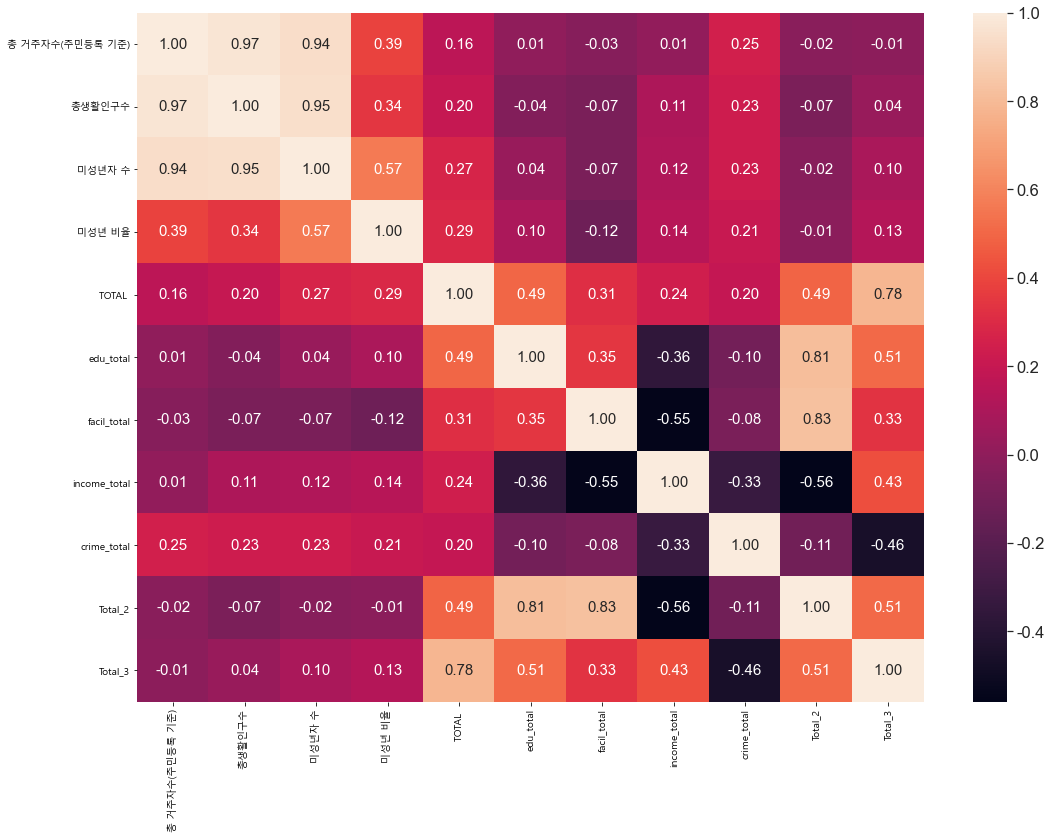

In [37]:
#상관관계 시각화로 나타내기
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale=1.5)
hm = sns.heatmap(corr ,
                 annot=True, 
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)
plt.tight_layout()
plt.show()

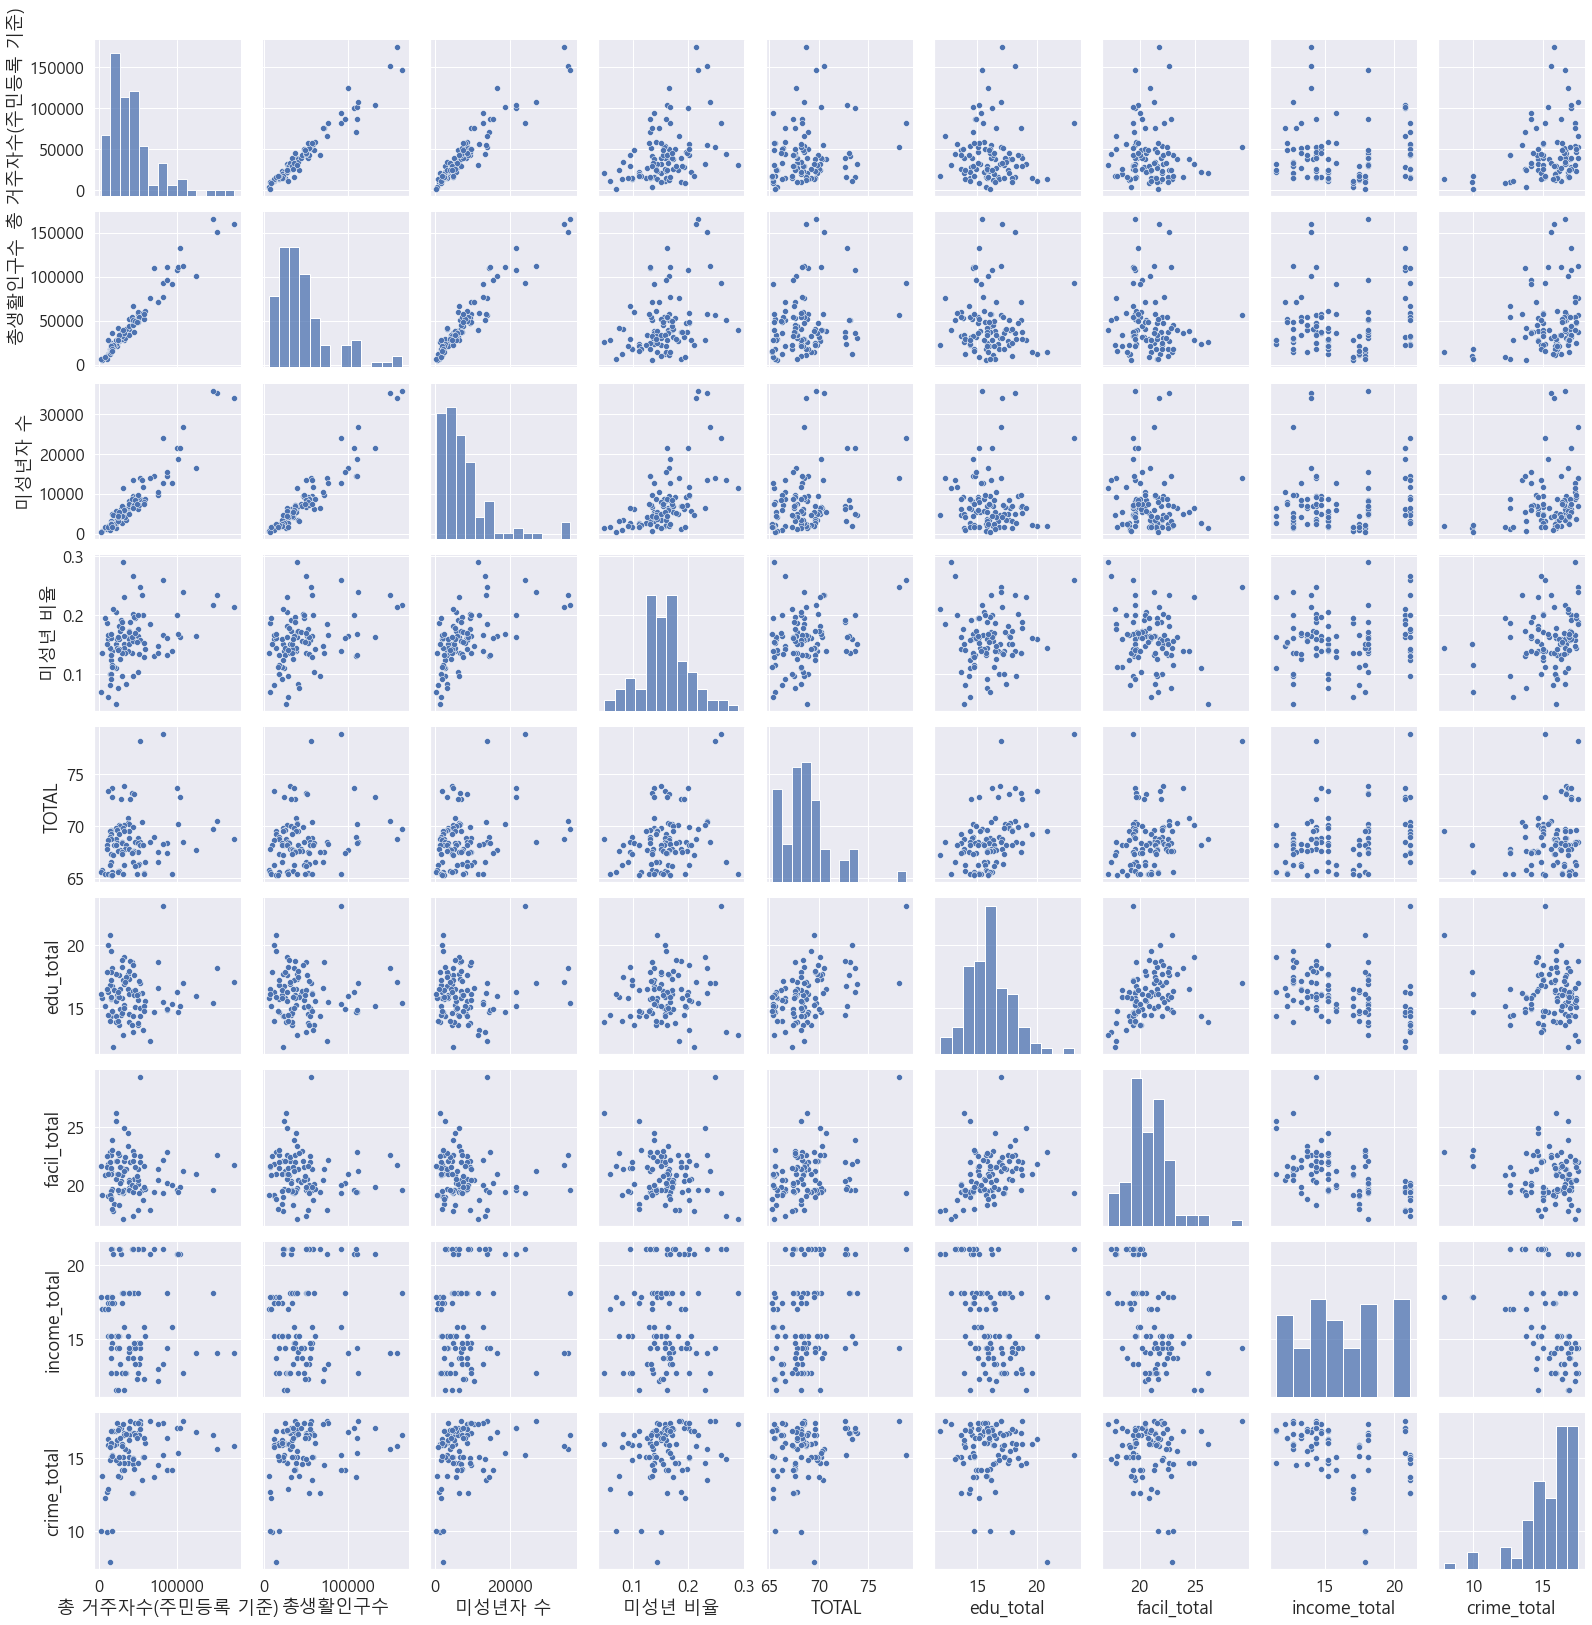

In [40]:
sns.pairplot(result[['총 거주자수(주민등록 기준)', '총생활인구수', '미성년자 수','미성년 비율', 'TOTAL ',
       'edu_total', 'facil_total', 'income_total', 'crime_total']])
# %matplotlib inline
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.family'] = 'Malgun Gothic'

plt.show()

In [94]:
from sklearn.cluster import KMeans

In [104]:
model = KMeans(n_clusters=5)

In [105]:
model.fit(result[cols])

KMeans(n_clusters=5)

In [107]:
model.predict(result[cols])

array([2, 2, 1, 2, 2, 2, 4, 4, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 1, 4,
       2, 0, 0, 0, 0, 2, 4, 0, 2, 0, 2, 0, 1, 0, 0, 3, 4, 4, 4, 4, 0, 0,
       4, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 0, 0, 1, 4, 4, 1, 1, 0,
       4, 1, 2, 1, 4, 0, 2, 0, 1, 1, 1, 3, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       2, 2, 0, 4, 4, 0, 2, 0, 1, 1, 0, 0, 0, 4, 4, 0, 0, 0, 0, 2, 4, 0,
       4, 4, 0, 4, 0, 2, 0, 0, 0, 4, 4, 2, 2, 4, 1, 1, 1, 2, 0, 2, 4, 4,
       2, 4, 0, 0, 4, 4, 0, 2, 0, 4, 4, 4, 0, 4, 4, 2, 2, 1, 0, 1, 0, 0,
       2, 2, 0, 0, 2, 0, 4, 0, 3, 0, 2, 3, 1, 3, 2, 2, 4, 0, 1, 0, 0, 2,
       4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 2, 0, 0, 0, 2, 4, 2, 2, 1,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 0, 2, 2])

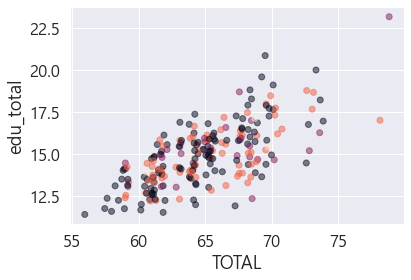

In [114]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(result[cols])
labels= model.predict(result[cols])

# 클러스터링 결과를 시각화합니다
# x = result[:, 0]
# y = samples[:, 1]
plt.scatter(result['TOTAL '] , result['edu_total'], c=labels, alpha=0.5)
plt.xlabel('TOTAL')
plt.ylabel('edu_total')
plt.show()

In [41]:
#K-means를 사용한 클러스터링(데이터 분석)


# from sklearn.cluster import KMeans

# X1= df[['Age', 'Spending Score (1-100)']].values

# inertia =[]

# for n in range(1 , 11):
#     algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
#                         tol=0.0001,  random_state= 111  , algorithm='elkan') )
#     algorithm.fit(X1)
#     inertia.append(algorithm.inertia_)

from sklearn.cluster import KMeans

X1 = result[['미성년 비율', 'edu_total']].values

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장합니다. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [42]:
inertia

[336.23727876403586,
 133.31034895929616,
 71.77317475225233,
 44.8521167418351,
 30.049136444792833,
 19.54213064394751,
 15.05644197745187,
 11.070370175264319,
 8.367008479743511,
 6.438951332004797]

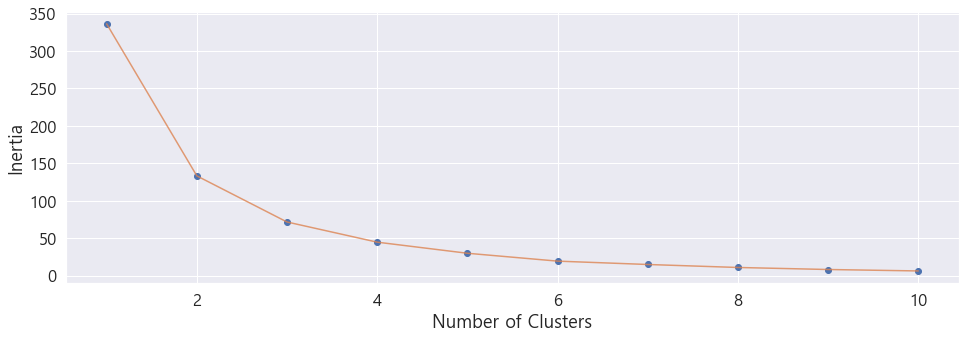

In [43]:
plt.figure(1, figsize=(16,5))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1, 11) ,inertia, '-', alpha = 0.8)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [46]:
X1 = result[['미성년 비율', 'edu_total' ]].values

algorithm = (KMeans(n_clusters = 4
        ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

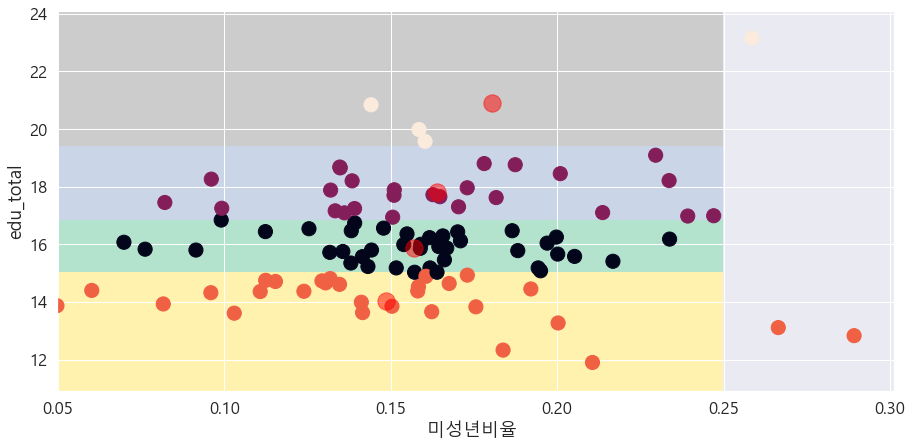

In [48]:
h = 0.2
x_min, x_max = X1[:, 0].min(), X1[:,0].max()
y_min, y_max = X1[:, 1].min() -1, X1[:,1].max() +1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = '미성년 비율' ,y = 'edu_total', data = result , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('edu_total') , plt.xlabel('미성년비율 ')
plt.show()
